<a href="https://colab.research.google.com/github/sanjanagarai/Dynamic_Portfolio_Optimization/blob/main/PortfolioOptimization_NBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and modules

In [ ]:
import pandas as pd
import numpy as np
import math

from scipy.optimize import minimize
import matplotlib.pyplot as plt

Loading the dataset

In [ ]:
#Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Our portfolio will consist of stocks of 3 companies: ADANIENT.NS, SBIN.NS, EICHERMOT.NS

In [ ]:
#Load the dataset
adani = pd.read_csv("/content/drive/MyDrive/TOP 10 NIFTY/ADANIENT.NS.csv")
sbi = pd.read_csv("/content/drive/MyDrive/TOP 10 NIFTY/SBIN.NS.csv")
eichermot = pd.read_csv("/content/drive/MyDrive/TOP 10 NIFTY/EICHERMOT.NS.csv")

In [ ]:
#Store only the close values in a numpy array
adani_close = adani.filter(['Close'])
adani_close = adani_close.values
sbi_close = sbi.filter(['Close'])
sbi_close = sbi_close.values
eichermot_close = eichermot.filter(['Close'])
eichermot_close = eichermot_close.values


Calculating the intermediaries required to formulate the NBI subproblem

In [ ]:
adani_return = 0
adani_return_list=[]
for i in range(1,len(adani_close)):
  ret = math.fabs((adani_close[i]-adani_close[i-1])/adani_close[i-1])
  adani_return+= ret
  adani_return_list.append(ret)


total = len(adani_close)-1
avg_adani_return = adani_return/total
print("The average return on ADANIENT over the 1 year stock data is: ", avg_adani_return)

The average return on ADANIENT over the 1 year stock data is:  0.02171286380599062


In [ ]:
sum=0
for i in range(len(adani_return_list)):
  sum+=(adani_return_list[i]-avg_adani_return)**2

avg=sum/len(adani_return_list)
sd_adani = avg**0.5
print("The risk associated with ADANIENT stock is: ", sd_adani)

The risk associated with ADANIENT stock is:  0.032868029346322256


In [ ]:
sbi_return = 0
sbi_return_list=[]
for i in range(1,len(sbi_close)):
  ret=math.fabs((sbi_close[i]-sbi_close[i-1])/sbi_close[i-1])
  sbi_return+= ret
  sbi_return_list.append(ret)

total = len(sbi_close)-1
avg_sbi_return = sbi_return/total
print("The average return on SBI over the 1 year stock data is: ", avg_sbi_return)

The average return on SBI over the 1 year stock data is:  0.01008635632695111


In [ ]:
sum=0
for i in range(len(sbi_return_list)):
  sum+=(sbi_return_list[i]-avg_sbi_return)**2

avg=sum/len(sbi_return_list)
sd_sbi = avg**0.5
print("The risk associated with SBI stock is: ", sd_sbi)

The risk associated with SBI stock is:  0.009240498004450927


In [ ]:
eichermot_return = 0
eichermot_return_list=[]
for i in range(1,len(eichermot_close)):
  ret = math.fabs((eichermot_close[i]-eichermot_close[i-1])/eichermot_close[i-1])
  eichermot_return+= ret
  eichermot_return_list.append(ret)

total = len(eichermot_close)-1
avg_eichermot_return = eichermot_return/total
print("The average return on EICHERMOT over the 1 year stock data is: ", avg_eichermot_return)

The average return on EICHERMOT over the 1 year stock data is:  0.010796811123927027


In [ ]:
sum=0
for i in range(len(eichermot_return_list)):
  sum+=(eichermot_return_list[i]-avg_eichermot_return)**2

avg=sum/len(eichermot_return_list)
sd_eichermot = avg**0.5
print("The risk assocaited with EICHERMOT stock is: ",sd_eichermot)

The risk assocaited with EICHERMOT stock is:  0.009672449223367258


Let the total investment amount be X and the fraction of amount in each stock be x1, x2 and x3 for ADANIENT, SBI AND EICHERMOTORS resepctively

In [ ]:
#Defining the functions

#risk function - function 1
def objective1(x):
  return sd_adani*x[0] + sd_sbi*x[1] + sd_eichermot*x[2]

#Return function - function 2
def objective2(x):
  return -(avg_adani_return*x[0] + avg_sbi_return*x[1] + avg_eichermot_return*x[2])

#Defning the constraints
#Budget constraints
def constraint1(x):
  return x[0]+x[1]+x[2]-1

#Risk limit
def constraint2(x):
    return 0.15 - sd_adani*x[0] + sd_sbi*x[1] + sd_eichermot*x[2]

con1 = {'type': 'eq', 'fun':constraint1}
con2 = {'type': 'ineq', 'fun':constraint2}
constraints = [con1, con2]
b=(0.2, 0.8)
X=[0.3, 0.5, 0.2]
bnds = (b,b,b)

Solution using Convex Optimization

In [ ]:
def objective3(x):
  global a1,a2
  return a1*(sd_adani*x[0] + sd_sbi*x[1] + sd_eichermot*x[2]) + a2*(-(avg_adani_return*x[0] + avg_sbi_return*x[1] + avg_eichermot_return*x[2]))

def objective4(x):
  global a1,a2
  return a1*(sd_adani*x[0] + sd_sbi*x[1] + sd_eichermot*x[2]) +5*a2*(-(avg_adani_return*x[0] + avg_sbi_return*x[1] + avg_eichermot_return*x[2]))

def objective5(x):
  global a1,a2
  return 10*a1*(sd_adani*x[0] + sd_sbi*x[1] + sd_eichermot*x[2]) + a2*(-(avg_adani_return*x[0] + avg_sbi_return*x[1] + avg_eichermot_return*x[2]))

X1=[]
Y1=[]
for i in range(21):
    a1=1-(0.05*i)
    a2=1-a1
    x1=X
    sol1 = minimize(objective3, x1, method='SLSQP',bounds= bnds , constraints=con2)
    print(sol1)
    print("weights: ", a1, a2)
    X1.append(objective1(sol1.x))
    print(objective1(sol1.x))
    print("F2: ", objective2(sol1.x))
    Y1.append(objective2(sol1.x))
    print("**********************************************************")

X2=[]
Y2=[]
#Feature Scaling
for i in range(21):
    a1=1-(0.05*i)
    a2=1-a1
    x1=X
    sol1 = minimize(objective4, x1, method='SLSQP',bounds= bnds , constraints=con2)
    print("weights: ", a1, a2)
    print("F1: ", objective1(sol1.x))
    X2.append(objective1(sol1.x))
    print("F2: ", objective2(sol1.x))
    Y2.append(objective2(sol1.x))
    print("**********************************************************")

X3=[]
Y3=[]
print("FEATURE SCALING")

for i in range(21):
    a1=1-(0.05*i)
    a2=1-a1
    x1=X
    sol1 = minimize(objective5, x1, method='SLSQP',bounds= bnds , constraints=con2)
    print("weights: ", a1, a2)
    print("F1: ", objective1(sol1.x))
    X3.append(objective1(sol1.x))
    print("F2: ", objective2(sol1.x))
    Y3.append(objective2(sol1.x))
    print("**********************************************************")


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.010356195314828091
       x: [ 2.000e-01  2.000e-01  2.000e-01]
     nit: 6
     jac: [ 3.287e-02  9.240e-03  9.672e-03]
    nfev: 24
    njev: 6
weights:  1.0 0.0
0.010356195314828091
F2:  -0.008519206251373753
**********************************************************
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.009412425236517996
       x: [ 2.000e-01  2.000e-01  2.000e-01]
     nit: 6
     jac: [ 3.014e-02  8.274e-03  8.649e-03]
    nfev: 24
    njev: 6
weights:  0.95 0.050000000000000044
0.01035619531482809
F2:  -0.008519206251373751
**********************************************************
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.008468655158207905
       x: [ 2.000e-01  2.000e-01  2.000e-01]
     nit: 7
     jac: [ 2.741e-02  7.308e-03  7.626e-03]
    nfev: 28
    njev: 7
weights:  0.9 0.09999999999999998
0.0

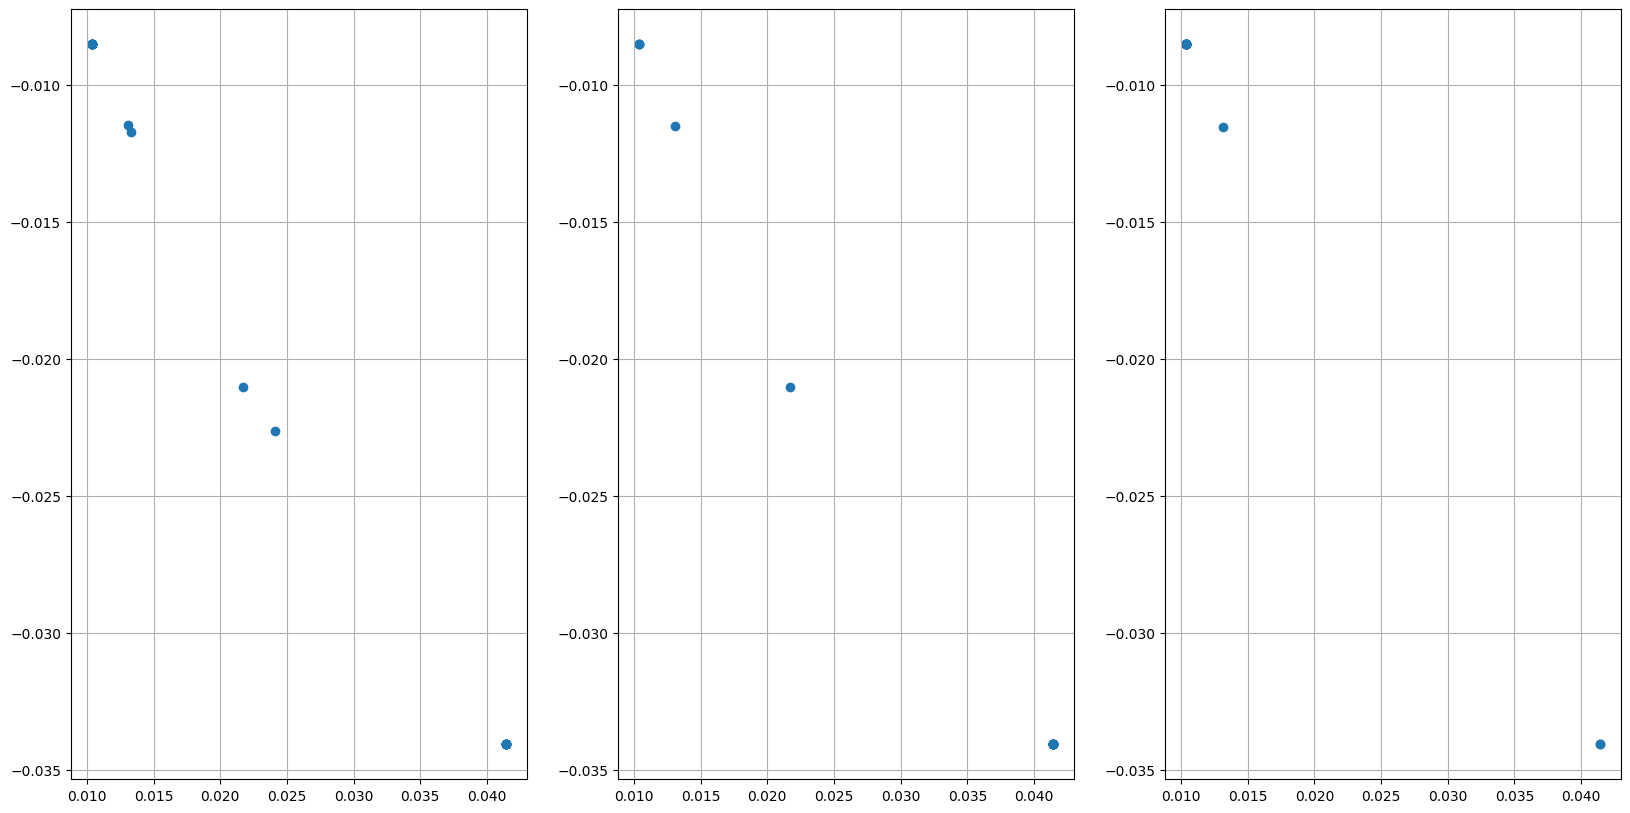

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.scatter(X1, Y1)
plt.grid()
plt.subplot(1,3,2)
plt.scatter(X2, Y2)
plt.grid()
plt.subplot(1,3,3)
plt.scatter(X3, Y3)
plt.grid()

Solution using NBI optimization

In [ ]:
#finding the individual minima
min_risk = minimize(objective1, X, method='SLSQP',bounds= bnds , constraints=constraints)
max_return = minimize(objective2, X, method='SLSQP',bounds= bnds , constraints=constraints)

print("Portfolio weights for minimum risk: ", min_risk.x)
print("Minimum risk: ", objective1(min_risk.x))
print("Portfolio weights for maximum return: ", max_return.x)
print("Maximum return: ", math.fabs(objective2(max_return.x)))

Portfolio weights for minimum risk:  [0.2        0.55159629 0.24840371]
Minimum risk:  0.01407330255971806
Portfolio weights for maximum return:  [0.6 0.2 0.2]
Maximum return:  0.017204351773769992


In [ ]:
#Determining the utopian points
print("F1* = ", "(",objective1(min_risk.x), ",", objective2(min_risk.x), ")")
print("F2* = ", "(",objective1(max_return.x), ",", objective2(max_return.x), ")")

F1* =  ( 0.01407330255971806 , -0.012588137432705662 )
F2* =  ( 0.02350340705335698 , -0.017204351773769992 )


## NBI Subproblem

In [ ]:
#Building the payoff matrix
y1=objective2(min_risk.x) - objective2(max_return.x)
y2=objective1(max_return.x) - objective1(min_risk.x)
print("Payoff matrix")
print("[      0            ",y1)
print("[",y2, "    0             ]")

Payoff matrix
[      0             0.00461621434106433
[ 0.00943010449363892     0             ]


The CHIM simplex is a line and hence we require its slope for the optimization problem


In [ ]:
slope = (objective2(min_risk.x) - objective2(max_return.x))/(objective1(max_return.x)-objective1(min_risk.x))
print(slope)

0.48951889601840565


In [ ]:
def main_nbi(x):
  return -x[3]

def nbi_con1(x):
  global a
  return (1-a)*y2 - x[3]*0.898 - sd_adani*x[0] + sd_sbi*x[1] + sd_eichermot*x[2] + objective1(min_risk.x)

def nbi_con2(x):
  global a
  return y1*a - x[3]*0.4399 + -(avg_adani_return*x[0] + avg_sbi_return*x[1] + avg_eichermot_return*x[2]) + objective2(max_return.x)

con1 = {'type': 'eq', 'fun': nbi_con1}
con2 = {'type': 'eq', 'fun': nbi_con2}
con3 = {'type': 'eq', 'fun': constraint1}
con4 = {'type': 'ineq', 'fun': constraint2}
constraints = [con1, con2, con3, con4]
b = (0.2, 0.8)
b2 = (-10e5, 10e5)
bnds = (b, b, b, b2)

X_nbi = []
Y_nbi = []

a = 1
for i in range(0, 21):
    a = 1 - (0.05 * i)
    X = [0.3, 0.5, 0.2, 0.4]
    print(i+1, "----------------------------------------------------------")
    sol1 = minimize(main_nbi, X, method='SLSQP', bounds=bnds, constraints=constraints)
    print("a1: ", a, "a2: ", 1-a)
    X_nbi.append(objective1(sol1.x))
    Y_nbi.append(objective2(sol1.x))
    print("Point on the cartesian plane: ", objective1(sol1.x), ", ", objective2(sol1.x))
    print("Weights: ", sol1.x)


1 ----------------------------------------------------------
a1:  1.0 a2:  0.0
Point on the cartesian plane:  0.02350340708939744 ,  -0.017204351797578593
Weights:  [0.6        0.2        0.2        0.35275422]
2 ----------------------------------------------------------
a1:  0.95 a2:  0.050000000000000044
Point on the cartesian plane:  0.023503407281292795 ,  -0.017204351924346085
Weights:  [0.60000001 0.2        0.2        0.35327665]
3 ----------------------------------------------------------
a1:  0.9 a2:  0.09999999999999998
Point on the cartesian plane:  0.023503407255386202 ,  -0.017204351907234128
Weights:  [0.60000001 0.2        0.2        0.35378423]
4 ----------------------------------------------------------
a1:  0.85 a2:  0.15000000000000002
Point on the cartesian plane:  0.023503407072288988 ,  -0.01720435178628143
Weights:  [0.6        0.2        0.2        0.35427759]
5 ----------------------------------------------------------
a1:  0.8 a2:  0.19999999999999996
Point on

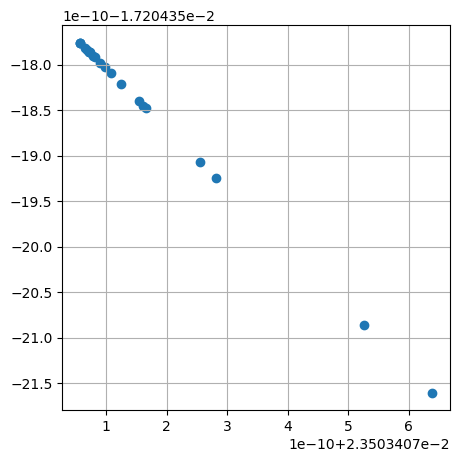

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_nbi, Y_nbi)
plt.grid()

In [ ]:
print(X_nbi)

[0.02350340708939744, 0.023503407281292795, 0.023503407255386202, 0.023503407072288988, 0.023503407067594025, 0.02350340707806323, 0.023503407161408026, 0.023503407106901783, 0.023503407153411638, 0.023503407638954536, 0.02350340705663982, 0.023503407056117698, 0.023503407124338658, 0.02350340708076836, 0.023503407165152864, 0.023503407070955665, 0.023503407527004003, 0.023503407056253135, 0.023503407065451513, 0.023503407071285627, 0.023503407097119098]


In [ ]:
print(Y_nbi)

[-0.017204351797578593, -0.017204351924346085, -0.017204351907234128, -0.01720435178628143, -0.017204351783175087, -0.017204351790091124, -0.01720435184514931, -0.01720435180914209, -0.01720435184013745, -0.01720435216062008, -0.01720435177593871, -0.01720435177559374, -0.017204351820661018, -0.017204351791878153, -0.01720435184762318, -0.01720435178542177, -0.017204352086664848, -0.017204351775683212, -0.017204351781761714, -0.017204351785645958, -0.017204351802679575]


Printing the risks and returns

In [ ]:
print("RISK                  RETURN")
for i in range(0, len(X_nbi)):
  print(X_nbi[i],"     ",Y_nbi[i]*(-1))

RISK                  RETURN
0.02350340708939744       0.017204351797578593
0.023503407281292795       0.017204351924346085
0.023503407255386202       0.017204351907234128
0.023503407072288988       0.01720435178628143
0.023503407067594025       0.017204351783175087
0.02350340707806323       0.017204351790091124
0.023503407161408026       0.01720435184514931
0.023503407106901783       0.01720435180914209
0.023503407153411638       0.01720435184013745
0.023503407638954536       0.01720435216062008
0.02350340705663982       0.01720435177593871
0.023503407056117698       0.01720435177559374
0.023503407124338658       0.017204351820661018
0.02350340708076836       0.017204351791878153
0.023503407165152864       0.01720435184762318
0.023503407070955665       0.01720435178542177
0.023503407527004003       0.017204352086664848
0.023503407056253135       0.017204351775683212
0.023503407065451513       0.017204351781761714
0.023503407071285627       0.017204351785645958
0.023503407097119098    

From the above, we can conclude that there is very little variation in the risk and return. For the optimal portfolio selection, the risk is 0.0235 and the return is 0.0172